# 25.01.23   
### 붓꽃 품종 예측 실습: 분류 모델

## set1

<Axes: >

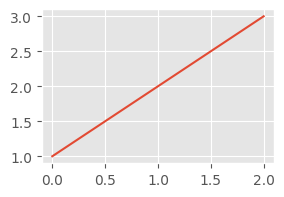

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))

In [28]:
from sklearn.datasets import load_iris
 
# 붓꽃 데이터 로딩
iris = load_iris()
 
print(iris.keys())
 
# 독립변수
feature = iris.data
feature_name = iris.feature_names
# print(feature)
print(feature_name)
 
# 종속변수
target = iris.target
target_name = iris.target_names
# print(target)
print(target_name)
 
# 데이터프레임 만들기
df_iris = pd.DataFrame(feature, columns=feature_name)
df_iris['species'] = target
df_iris.head()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
feature.shape

(150, 4)

In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### 데이터 균등한지 확인

In [6]:
df_iris['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

### 산점도

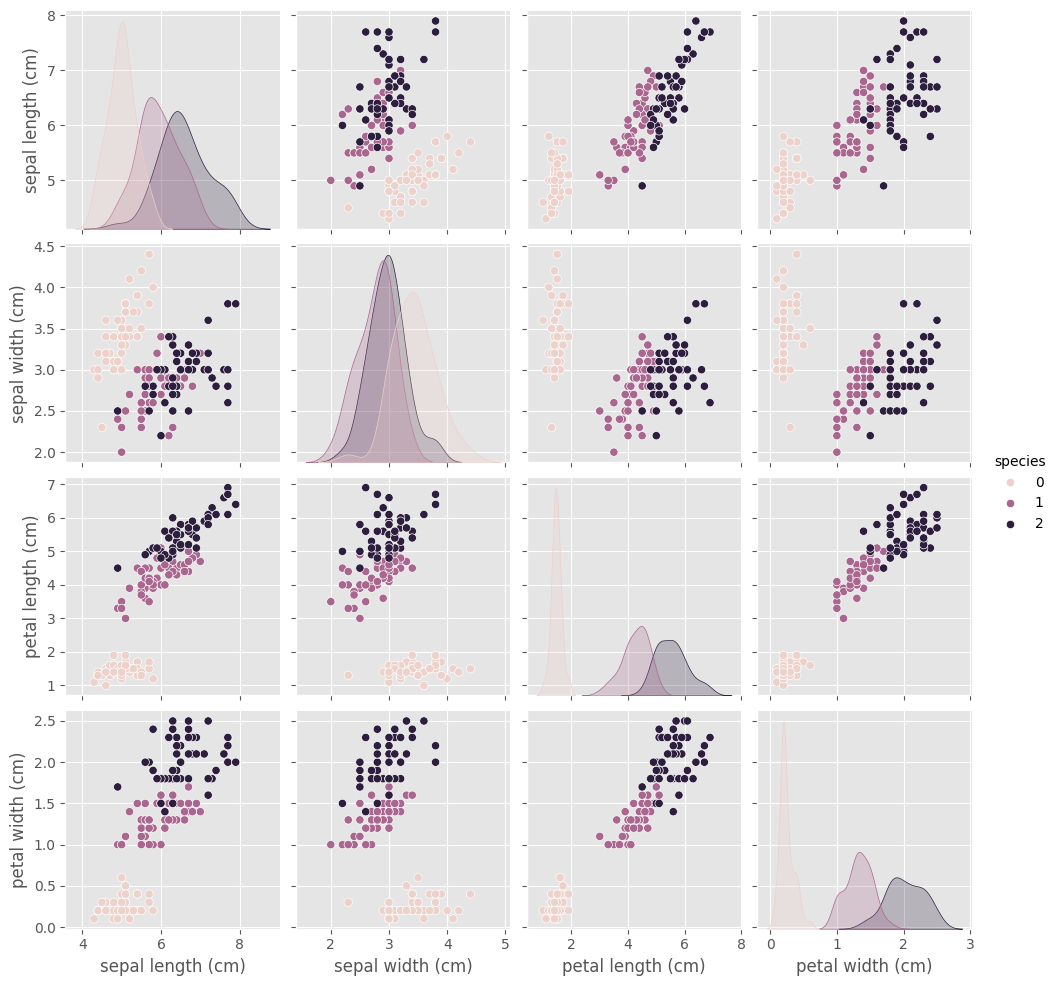

In [7]:
sns.pairplot(data=df_iris, hue='species')
pass

## set2

<Axes: >

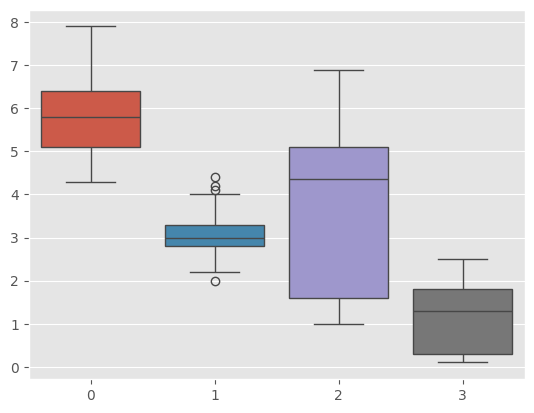

In [8]:
X = feature
y = target

sns.boxplot(X)

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(120, 4) (30, 4) (120,) (30,)


<Axes: >

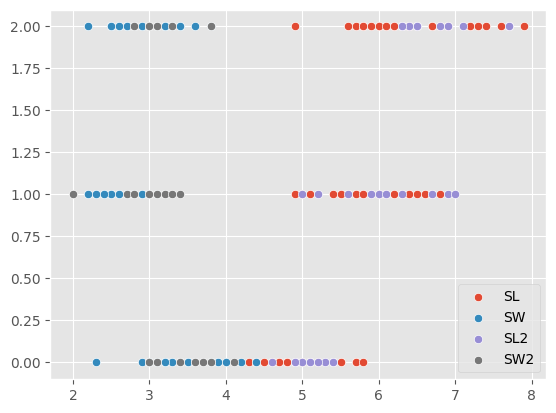

In [121]:

sns.scatterplot(x=X_train[:,0], y=y_train, label="SL", markers=".")
sns.scatterplot(x=X_train[:,1], y=y_train, label="SW", markers="*")
# sns.scatterplot(x=X_train[:,2], y=y_train, label="PL", markers="x")
# sns.scatterplot(x=X_train[:,3], y=y_train, label="PW", markers="o")

sns.scatterplot(x=X_test[:,0], y=y_test, label="SL2", markers=".")
sns.scatterplot(x=X_test[:,1], y=y_test, label="SW2", markers="*")
# sns.scatterplot(x=X_test[:,2], y=y_test, label="PL2", markers="x")
# sns.scatterplot(x=X_test[:,3], y=y_test, label="PW2", markers="o")

In [ ]:
sns.pairplot(X_test)

### 데이터가 균등하게 분할되었는지 확인

In [108]:
pd.Series(y_train).value_counts()

2    40
0    40
1    40
Name: count, dtype: int64

### 모델 생성 및 훈련

In [109]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

### 평가

In [110]:
pred = model.predict(X_test)
print(f"예측: {pred}")
print(f"실측: {y_test}")

from sklearn.metrics import accuracy_score, classification_report

print(f"예측 정확도 >>>> {accuracy_score(y_test, pred)}")
print(classification_report(y_test, pred))

예측: [1 2 2 0 2 2 2 0 1 2 0 1 0 0 1 0 2 0 0 2 2 1 1 1 0 1 2 0 2 1]
실측: [2 2 2 0 2 2 2 0 1 2 0 1 0 0 1 0 2 0 0 1 2 1 1 1 0 1 1 0 2 1]
예측 정확도 >>>> 0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.80      0.84        10
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



### 트리 시각화

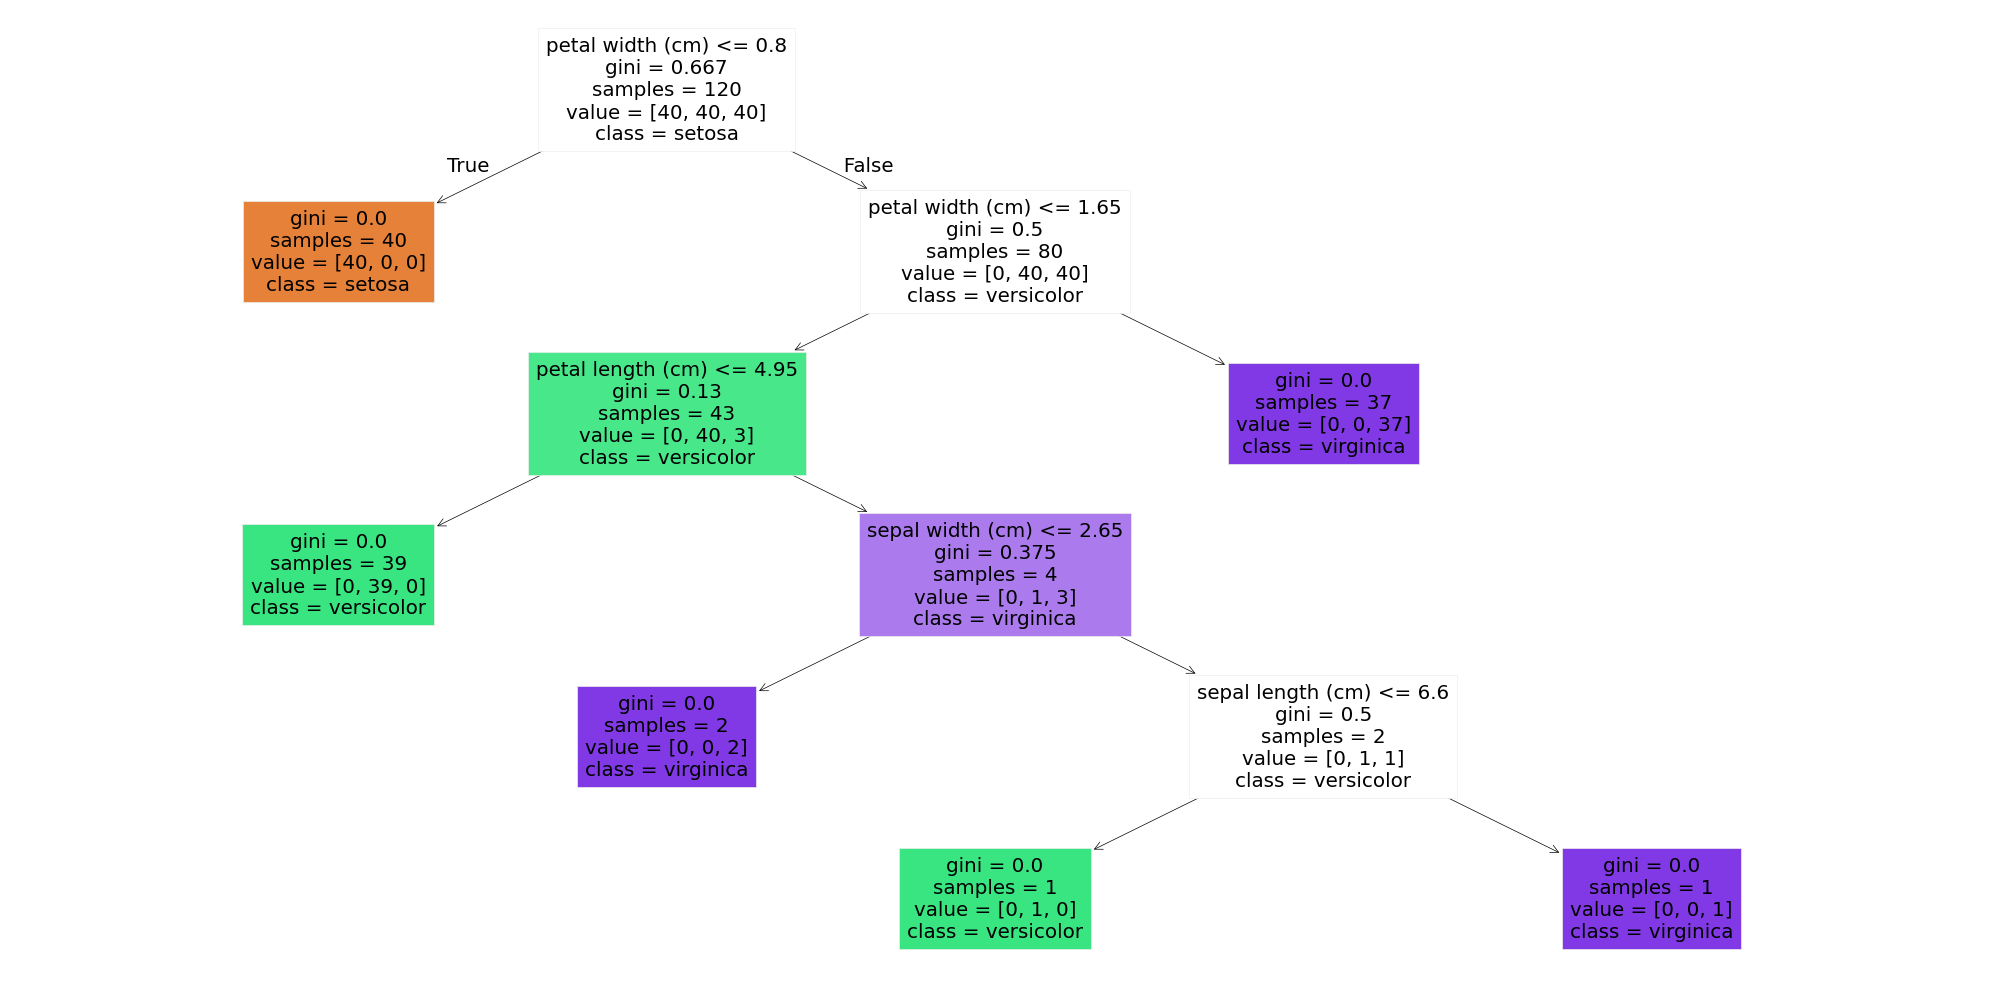

In [111]:
plt.figure(figsize=(20,10))
from sklearn.tree import plot_tree
plot_tree(model, feature_names=feature_name,
          class_names=target_name, filled=True)

plt.tight_layout()
pass

### barplot으로 확인하기

<Axes: >

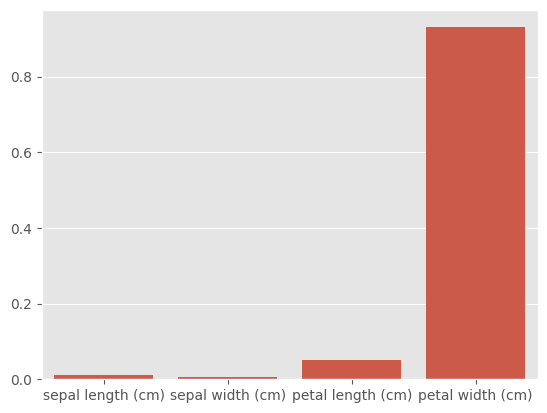

In [112]:
sns.barplot(x=feature_name, y=model.feature_importances_)

### 교차검증 반복문으로 코딩하기

In [128]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)

cv_scores = []

for tr_idx, val_idx in kf.split(X_train) :
    X_tr, y_tr = X_train[tr_idx], y_train[tr_idx]
    X_val, y_val = X_train[val_idx], y_train[val_idx]

    model.fit(X_tr, y_tr)
    pred = model.predict(X_val)
    print(accuracy_score(y_val, pred))
    cv_scores.append(accuracy_score(y_val, pred))
    # print('-'*50)
    # print(f'tr_idx:{tr_idx}')
    # print(f'val_idx:{val_idx}')

print(np.mean(cv_scores))

1.0
0.9166666666666666
0.9583333333333334
1.0
0.9583333333333334
0.9666666666666666


### 예측 정확도 확인

In [125]:
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))

0.9333333333333333


### 다른 분 코드 주석

In [130]:
from sklearn.model_selection import StratifiedKFold # StratifiedKFold 교차검증 = 층화추출
skf = StratifiedKFold(n_splits=5, shuffle=True) # 5겹 층화추출 교차검증

#for tr_index, val_index in skf.split(X_train, y_train):
#    print(f'tr_inx:{tr_index}')
#    print(f'val_index:{val_index}') # 교차검증 데이터셋 확인

cv_scores = [] # 교차검증 정확도 리스트

for tr_index, val_index in skf.split(X_train, y_train):
    X_tr, y_tr = X_train[tr_index], y_train[tr_index] # 학습용 데이터셋
    X_val, y_val = X_train[val_index], y_train[val_index] # 검증용 데이터셋


    model.fit(X_tr, y_tr) # 모델 훈련
    pred = model.predict(X_val) # 검증용 데이터셋으로 예측
    print(f'정확도 >>>', {accuracy_score(y_val, pred)}) # 정확도 계산
    cv_scores.append(accuracy_score(y_val, pred)) # 정확도 리스트에 추가

    # print('-'*50) # 구분선
    # print(f' tr_index : {tr_index}') # 학습용 데이터셋 인덱스
    # print(f' val_index : {val_index}') # 검증용 데이터셋 인덱스

np.mean(cv_scores) # 교차검증 정확도 평균

정확도 >>> {0.9583333333333334}
정확도 >>> {0.9583333333333334}
정확도 >>> {0.9583333333333334}
정확도 >>> {0.9583333333333334}
정확도 >>> {1.0}


np.float64(0.9666666666666668)

### 하이퍼파라미터 준비

In [131]:
model = DecisionTreeClassifier()
kf = StratifiedKFold(n_splits=5, shuffle=True)

# 하이퍼파라미터 준비
parameters = {'max_depth':[3,4,5],
            'min_samples_split':[2,4]
}
 
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(model, param_grid=parameters, cv=kf, refit=True)

gscv.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_split': [2, 4]})

### 그리드서치 결과 확인 

In [132]:
pd.DataFrame(gscv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000907,0.000185,0.001004,0.000008,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.916667,1.0,0.958333,0.958333,1.0,0.966667,0.031180,2
1,0.001112,0.000247,0.000399,0.000489,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.916667,1.0,0.958333,0.958333,1.0,0.966667,0.031180,2
2,0.001910,0.001370,0.002106,0.000679,4,2,"{'max_depth': 4, 'min_samples_split': 2}",0.958333,1.0,0.958333,0.958333,1.0,0.975000,0.020412,1
3,0.001516,0.000772,0.000880,0.000471,4,4,"{'max_depth': 4, 'min_samples_split': 4}",0.916667,1.0,0.958333,0.958333,1.0,0.966667,0.031180,2
4,0.001096,0.000207,0.001003,0.000005,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.916667,1.0,0.958333,0.958333,1.0,0.966667,0.031180,2
5,0.000903,0.000198,0.000600,0.000490,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.916667,1.0,0.958333,0.958333,1.0,0.966667,0.031180,2


최적의 파라미터: {'max_depth': 4, 'min_samples_split': 2}	  
최고 정확도 : 0.975000

### 최종모델

In [134]:
best_model = gscv.best_estimator_

pred = best_model.predict(X_test)
accuracy_score(y_test, pred)

0.9333333333333333

### 랜덤포레스트

In [135]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
kf = StratifiedKFold(n_splits=5, shuffle=True)

# 하이퍼파라미터 준비
parameters = {'max_depth':[3,4,5],
            'min_samples_split':[2,4]
}
 
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(model, param_grid=parameters, cv=kf, refit=True)

gscv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_split': [2, 4]})

### accuracy score 출력

In [136]:
best_model = gscv.best_estimator_

pred = best_model.predict(X_test)
accuracy_score(y_test, pred)

0.9333333333333333